# Programming Practice III

## 1 Overview

## 2 Tasks

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### 2.1 Define Neural Network

In [3]:
# ----- useful functions from P2 -----
def create_toy_dataset(n_samples=100):
    x = np.linspace(-1,1,n_samples)
    y = 0.1*x + x**2 + x**3
    x = x.reshape(x.shape[0],1)
    y = y.reshape(y.shape[0],1)
    return x,y

def mse(y_true, y_pred):
    return np.mean((y_pred-y_true)**2)


def derivative_mse(y_true, y_pred):
    return -2*(np.mean((y_pred-y_true)))
    # TODO



#def update_parameters(parameters, gradient, learning_rate):
    
def update_parameters(w1, b1, w2, b2, dLdw1, dLdb1, dLdw2, dLdb2, learning_rate):
    w1 -=(learning_rate*dLdw1.T)
    b1 -=(learning_rate*dLdb1)
    w2 -=(learning_rate*dLdw2)
    b2 -=(learning_rate*dLdb2)
    return w1, b1, w2, b2

# ----- ReLU and its derivative -----
def relu(x):
    return x * (x > 0)
    # TODO

def derivative_relu(x):
    return 1 * (x > 0)

# sigmoid and its derivative
def sigmoid(x):
    return 1/(1+np.exp(-x))

def derivative_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

# forward pass or prediction 
def forward_pass(x, w1, b1, w2, b2):
    x=x.reshape(x.shape[0],1)
    # Output layer
    y_hat = np.dot(relu(np.dot(x, (w1.T)) + (b1.T)),w2) + b2
    return y_hat

def cal_gradient(x, y, y_hat, w1, b1, w2, b2):
    # Hidden layer
    Z1 = np.dot(x, w1.T) + b1.T
    A1 = sigmoid(Z1)
    # Output layer
    y_hat = np.dot(A1, w2) + b2
    m = x.shape[0]
    # Output layer
    dZ2 = y_hat - y
    dLdw2 = (1 / m) * np.dot(A1.T, dZ2)
    dLdb2 = (1 / m) * np.sum(dZ2, axis=0)
    # Hidden layer
    dZ1 = np.dot(dZ2, w2.T) * derivative_sigmoid(A1)
    dLdw1 = (1 / m) * np.dot(x.T, dZ1)
    dLdb1 = (1 / m) * np.sum(dZ1, axis=0)
    dLdb1 = dLdb1.reshape(dLdb1.shape[0],1)
    return dLdw1, dLdb1, dLdw2, dLdb2

In [4]:
class NeuralNetwork():
    def __init__(self, x, y, w1, b1, w2, b2, learning_rate, epcohs,step):
        np.random.seed(42)
        #n_nuerons_hidden_size = 500
        self.learning_rate = learning_rate
        self.w1 = w1
        self.w2 = w2
        self.b1 = b1
        self.b2 = b2
        self.x = x
        self.y = y
        self. epcohs = epcohs 
        self.step = step
        #step defines how often do you want to print the loss output whilst training
    
    def train(self):
        #n_inputs = self.x.shape[1]

        losses = np.array([1])
        for i in range(self.epcohs):
            # Forward propagation
            y_hat = forward_pass(self.x, self.w1, self.b1, self.w2, self.b2)
            # Backward propagation
            dLdw1, dLdb1, dLdw2, dLdb2 = cal_gradient(self.x, self.y, y_hat,self.w1, self.b1, self.w2, self.b2)
            self.w1, self.b1, self.w2, self.b2 = update_parameters(self.w1, self.b1, self.w2, self.b2, dLdw1, dLdb1, dLdw2, dLdb2, self.learning_rate)
            

            if (i+1) % self.step == 0:
                loss = mse(self.y, y_hat)
                losses = np.append(losses, loss)
                #print(self.y,y_hat)
                print(f"Epoch: {i+1}, Loss: {loss}")

        return self.w1 , self.b1, self.w2, self.b2 ,losses
    
        
    def losses(losses):
        return losses

    def predict(self):
        #self.x=self.x.reshape(self.x.shape[0],1)
        # Output layer
        y_hat = np.dot(sigmoid(np.dot(self.x, self.w1.T) + self.b1.T),self.w2) + self.b2
        return y_hat
    


### 2.2 Parameter Initialization

In [5]:
def initialize_parameters(method = 'Random', num_neurons = 500):

    # TODO: hyperparameters, parameter initialization, Initialize weights and biases
    methods = ['Zero','Random','Xavier','HE','Uniform','Pretrained']
    np.random.seed(42)
    n_nuerons_hidden_size = num_neurons
    if method == methods[0]:
        w1 = np.zeros((n_nuerons_hidden_size,1))
        b1 = np.zeros((n_nuerons_hidden_size,1))
        w2 = np.zeros((n_nuerons_hidden_size, 1))
        b2 = np.zeros((1, 1))

    elif method == methods[1]:
            w1 = np.random.randn(n_nuerons_hidden_size,1)
            b1 = np.random.randn(n_nuerons_hidden_size,1)
            w2 = np.random.randn(n_nuerons_hidden_size, 1)
            b2 = np.random.randn(1, 1)

    elif method == methods[2]:
            xavier_variance = 1 / n_nuerons_hidden_size
            w1 = np.random.randn(n_nuerons_hidden_size,1)* np.sqrt(xavier_variance)
            b1 = np.random.randn(n_nuerons_hidden_size,1)* np.sqrt(xavier_variance)
            w2 = np.random.randn(n_nuerons_hidden_size, 1)* np.sqrt(xavier_variance)
            b2 = np.random.randn(1, 1)* np.sqrt(xavier_variance)

    elif method == methods[3]:
            he_variance = 2 / n_nuerons_hidden_size
            w1 = np.random.randn(n_nuerons_hidden_size,1)* np.sqrt(he_variance)
            b1 = np.random.randn(n_nuerons_hidden_size,1)* np.sqrt(he_variance)
            w2 = np.random.randn(n_nuerons_hidden_size, 1)* np.sqrt(he_variance)
            b2 = np.random.randn(1, 1)* np.sqrt(he_variance)
    
    elif method == methods[4]:
            w1 = np.random.uniform(n_nuerons_hidden_size,1)
            b1 = np.random.uniform(n_nuerons_hidden_size,1)
            w2 = np.random.uniform(n_nuerons_hidden_size, 1)
            b2 = np.random.uniform(1, 1)

    elif method == methods[5]:
            w1 = np.random.randn(n_nuerons_hidden_size,1)
            b1 = np.zeros((n_nuerons_hidden_size,1))
            w2 = np.random.randn(n_nuerons_hidden_size, 1)
            b2 = np.zeros((1, 1))

    return w1, b1, w2, b2

In [5]:
# TODO: train neural networks with different intialization methods
# TODO: visualize the results
# datasets # Generate sample input data

n_samples = 1000
x , y = create_toy_dataset(n_samples)


# TODO: hyperparameters, parameter initialization, Initialize weights and biases
# different types of initialization are: 
# 'Zero','Random','Xavier','HE','Uniform','Pretrained'
w1, b1, w2, b2 = initialize_parameters(method = 'Zero', num_neurons = 500)

learning_rate = 0.01
epcohs = 10000
step = 500

# TODO: training
NN = NeuralNetwork(x, y, w1, b1, w2, b2, learning_rate, epcohs, step)
w1, b1, w2, b2 , losses = NN.train()

#x, y,  w1, b1,  w2, b2, learning_rate , epcohs
# Normalize the input data
#X_normalized = X / np.max(X)

# Train the neural network


# Predict using the trained network
predictions = NN.predict()

Epoch: 500, Loss: 0.38620712168841626
Epoch: 1000, Loss: 0.3862997451861116
Epoch: 1500, Loss: 0.38653273881617606
Epoch: 2000, Loss: 0.38690660010006256
Epoch: 2500, Loss: 0.3874221847954637
Epoch: 3000, Loss: 0.3880807082293373
Epoch: 3500, Loss: 0.38888374752844596
Epoch: 4000, Loss: 0.38983324474602454


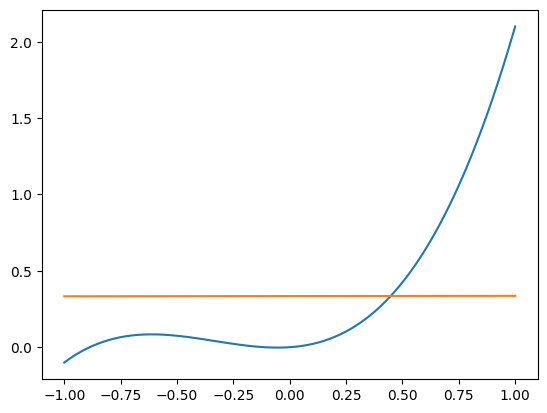

In [ ]:

plt.plot(x,y)
plt.plot(x,predictions)

In [ ]:
# TODO: train neural networks with different intialization methods
# TODO: visualize the results
# datasets # Generate sample input data

n_samples = 1000
x , y = create_toy_dataset(n_samples)


# TODO: hyperparameters, parameter initialization, Initialize weights and biases
# different types of initialization are: 
# 'Zero','Random','Xavier','HE','Uniform','Pretrained'
w1, b1, w2, b2 = initialize_parameters(method = 'Random', num_neurons = 500)

learning_rate = 0.01
epcohs = 10000
step = 500

# TODO: training
NN = NeuralNetwork(x, y, w1, b1, w2, b2, learning_rate, epcohs, step)
w1, b1, w2, b2 , losses = NN.train()

#x, y,  w1, b1,  w2, b2, learning_rate , epcohs
# Normalize the input data
#X_normalized = X / np.max(X)

# Train the neural network


# Predict using the trained network
predictions = NN.predict()

plt.plot(x,y)
plt.plot(x,predictions)

Epoch: 500, Loss: 74.51669469797058
Epoch: 1000, Loss: 90.95597977176405


Epoch: 500, Loss: 0.25438358365309344
Epoch: 1000, Loss: 0.19596056072447993
Epoch: 1500, Loss: 0.1835105874971743
Epoch: 2000, Loss: 0.2087158371155072
Epoch: 2500, Loss: 0.24986810261228634
Epoch: 3000, Loss: 0.2885457351816631
Epoch: 3500, Loss: 0.3172066627021399
Epoch: 4000, Loss: 0.3359395056294262
Epoch: 4500, Loss: 0.34742266709564
Epoch: 5000, Loss: 0.354286083738532
Epoch: 5500, Loss: 0.35840277003401594
Epoch: 6000, Loss: 0.36094558423537465
Epoch: 6500, Loss: 0.3626046028604673
Epoch: 7000, Loss: 0.3637729466275414
Epoch: 7500, Loss: 0.3646707460119039
Epoch: 8000, Loss: 0.36542004384473553
Epoch: 8500, Loss: 0.3660882882151712
Epoch: 9000, Loss: 0.36671257020606135
Epoch: 9500, Loss: 0.3673132607400478
Epoch: 10000, Loss: 0.3679016137323009


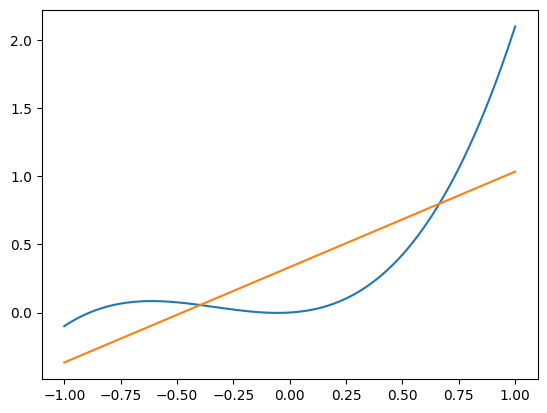

In [ ]:
# TODO: train neural networks with different intialization methods
# TODO: visualize the results
# datasets # Generate sample input data

n_samples = 1000
x , y = create_toy_dataset(n_samples)


# TODO: hyperparameters, parameter initialization, Initialize weights and biases
# different types of initialization are: 
# 'Zero','Random','Xavier','HE','Uniform','Pretrained'
w1, b1, w2, b2 = initialize_parameters(method = 'Xavier', num_neurons = 500)

learning_rate = 0.01
epcohs = 10000
step = 500

# TODO: training
NN = NeuralNetwork(x, y, w1, b1, w2, b2, learning_rate, epcohs, step)
w1, b1, w2, b2 , losses = NN.train()

#x, y,  w1, b1,  w2, b2, learning_rate , epcohs
# Normalize the input data
#X_normalized = X / np.max(X)

# Train the neural network


# Predict using the trained network
predictions = NN.predict()

plt.plot(x,y)
plt.plot(x,predictions)

Epoch: 500, Loss: 0.18951190042409344
Epoch: 1000, Loss: 0.174610396022035
Epoch: 1500, Loss: 0.22013223716624636
Epoch: 2000, Loss: 0.2719698029402148
Epoch: 2500, Loss: 0.3096281525729253
Epoch: 3000, Loss: 0.3324574175727768
Epoch: 3500, Loss: 0.3452383451806238
Epoch: 4000, Loss: 0.35222173465117224
Epoch: 4500, Loss: 0.35609464977025523
Epoch: 5000, Loss: 0.35835702929710095
Epoch: 5500, Loss: 0.3598002300861894
Epoch: 6000, Loss: 0.3608307645060609
Epoch: 6500, Loss: 0.3616547751343578
Epoch: 7000, Loss: 0.3623760583843185
Epoch: 7500, Loss: 0.36304682074111627
Epoch: 8000, Loss: 0.36369313797581493
Epoch: 8500, Loss: 0.364328116554904
Epoch: 9000, Loss: 0.3649583041776988
Epoch: 9500, Loss: 0.3655870445869325
Epoch: 10000, Loss: 0.3662159331362222


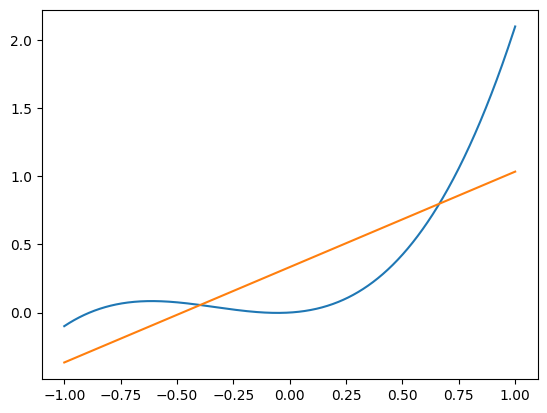

In [ ]:
# TODO: train neural networks with different intialization methods
# TODO: visualize the results
# datasets # Generate sample input data

n_samples = 1000
x , y = create_toy_dataset(n_samples)


# TODO: hyperparameters, parameter initialization, Initialize weights and biases
# different types of initialization are: 
# 'Zero','Random','Xavier','HE','Uniform','Pretrained'
w1, b1, w2, b2 = initialize_parameters(method = 'HE', num_neurons = 500)

learning_rate = 0.01
epcohs = 10000
step = 500

# TODO: training
NN = NeuralNetwork(x, y, w1, b1, w2, b2, learning_rate, epcohs, step)
w1, b1, w2, b2 , losses = NN.train()

#x, y,  w1, b1,  w2, b2, learning_rate , epcohs
# Normalize the input data
#X_normalized = X / np.max(X)

# Train the neural network


# Predict using the trained network
predictions = NN.predict()

plt.plot(x,y)
plt.plot(x,predictions)

Epoch: 500, Loss: 2.3547234236394394
Epoch: 1000, Loss: 3.4056048289119842
Epoch: 1500, Loss: 5.100422489303515
Epoch: 2000, Loss: 7.349682266616241
Epoch: 2500, Loss: 10.069711316568572
Epoch: 3000, Loss: 13.184676321203428
Epoch: 3500, Loss: 16.629586371854572
Epoch: 4000, Loss: 20.340333861043792
Epoch: 4500, Loss: 24.273185844515755
Epoch: 5000, Loss: 28.39509422553733
Epoch: 5500, Loss: 32.66820419705467
Epoch: 6000, Loss: 37.04750815932263
Epoch: 6500, Loss: 41.49837179639822
Epoch: 7000, Loss: 45.99319555420666
Epoch: 7500, Loss: 50.4958467713767
Epoch: 8000, Loss: 54.989364560512826
Epoch: 8500, Loss: 59.45152289439503
Epoch: 9000, Loss: 63.860951486032846
Epoch: 9500, Loss: 68.21066907791761
Epoch: 10000, Loss: 72.4918617656978


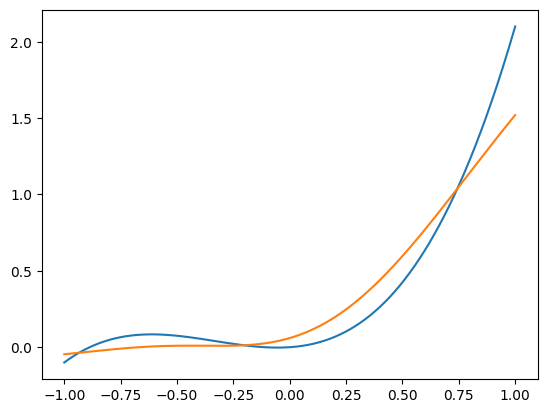

In [ ]:
# TODO: train neural networks with different intialization methods
# TODO: visualize the results
# datasets # Generate sample input data

n_samples = 1000
x , y = create_toy_dataset(n_samples)


# TODO: hyperparameters, parameter initialization, Initialize weights and biases
# different types of initialization are: 
# 'Zero','Random','Xavier','HE','Uniform','Pretrained'
w1, b1, w2, b2 = initialize_parameters(method = 'Pretrained', num_neurons = 500)

learning_rate = 0.01
epcohs = 10000
step = 500

# TODO: training
NN = NeuralNetwork(x, y, w1, b1, w2, b2, learning_rate, epcohs, step)
w1, b1, w2, b2 , losses = NN.train()

#x, y,  w1, b1,  w2, b2, learning_rate , epcohs
# Normalize the input data
#X_normalized = X / np.max(X)

# Train the neural network


# Predict using the trained network
predictions = NN.predict()

plt.plot(x,y)

plt.plot(x,predictions)
plt.show()

In [ ]:
# TODO: train neural networks with different intialization methods
# TODO: visualize the results
# datasets # Generate sample input data

n_samples = 1000
x , y = create_toy_dataset(n_samples)


# TODO: hyperparameters, parameter initialization, Initialize weights and biases
# different types of initialization are: 
# 'Zero','Random','Xavier','HE','Uniform','Pretrained'
w1, b1, w2, b2 = initialize_parameters(method = 'Uniform', num_neurons = 500)

learning_rate = 0.01
epcohs = 10000
step = 500

# TODO: training
NN = NeuralNetwork(x, y, w1, b1, w2, b2, learning_rate, epcohs, step)
w1, b1, w2, b2 , losses = NN.train()

#x, y,  w1, b1,  w2, b2, learning_rate , epcohs
# Normalize the input data
#X_normalized = X / np.max(X)

# Train the neural network


# Predict using the trained network
predictions = NN.predict()

plt.plot(x,y)
plt.plot(x,predictions)

AttributeError: 'float' object has no attribute 'T'

### 2.3 Learning Rate

C:\Users\prafu\AppData\Local\Temp\ipykernel_8344\3365990800.py:38: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


Epoch: 500, Loss: 0.27646145628805413
Epoch: 1000, Loss: 0.27965656636589115
Epoch: 1500, Loss: 0.2678971962079912
Epoch: 2000, Loss: 0.4756749885727407
Epoch: 2500, Loss: 0.857982542429972
Epoch: 3000, Loss: 0.41440353304119504
Epoch: 3500, Loss: 1.503488782214713
Epoch: 4000, Loss: 2.2702945731458595
Epoch: 4500, Loss: 1.991551569433591
Epoch: 5000, Loss: 4.549821303987736


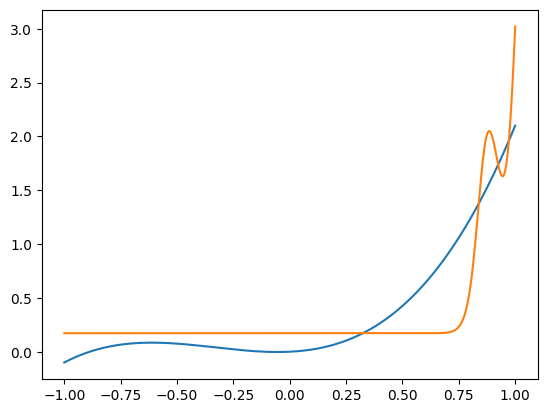

Epoch: 500, Loss: 4.62634085249256
Epoch: 1000, Loss: 4.669070364599492
Epoch: 1500, Loss: 4.677965620742242
Epoch: 2000, Loss: 4.655249610585724
Epoch: 2500, Loss: 4.650928187348001
Epoch: 3000, Loss: 4.692230906733094
Epoch: 3500, Loss: 4.766227883646207
Epoch: 4000, Loss: 4.859428447745034
Epoch: 4500, Loss: 5.009282405015117
Epoch: 5000, Loss: 5.217435887541661


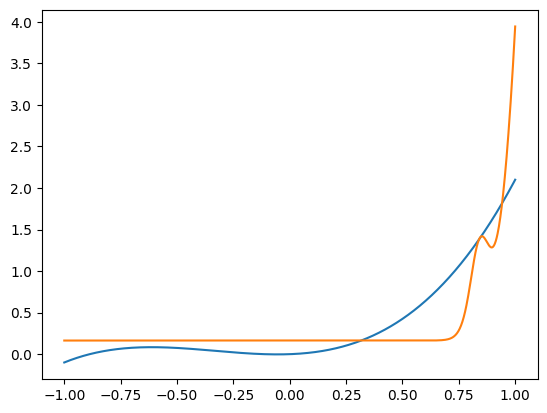

Epoch: 500, Loss: 5.240429852689574
Epoch: 1000, Loss: 5.264412636899282
Epoch: 1500, Loss: 5.287372450463861
Epoch: 2000, Loss: 5.3107558267829145
Epoch: 2500, Loss: 5.3352648636974465
Epoch: 3000, Loss: 5.359030516061999
Epoch: 3500, Loss: 5.382650577118283
Epoch: 4000, Loss: 5.407303614983242
Epoch: 4500, Loss: 5.4314291338493454
Epoch: 5000, Loss: 5.455111574163183


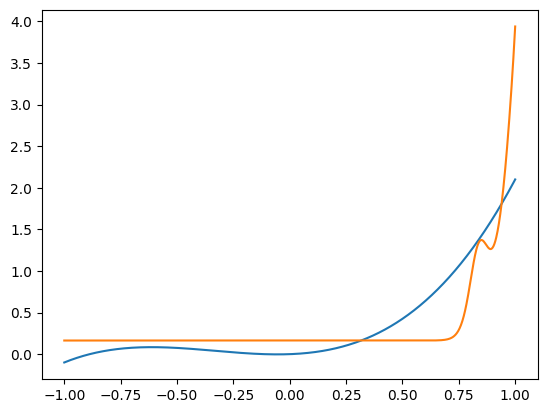

Epoch: 500, Loss: 5.457555863432062
Epoch: 1000, Loss: 5.459992670015788
Epoch: 1500, Loss: 5.462424990539353
Epoch: 2000, Loss: 5.464856471524866
Epoch: 2500, Loss: 5.467292179564162
Epoch: 3000, Loss: 5.469737173037633
Epoch: 3500, Loss: 5.472314572605048
Epoch: 4000, Loss: 5.474887186665069
Epoch: 4500, Loss: 5.4773855191203085
Epoch: 5000, Loss: 5.479839573410868


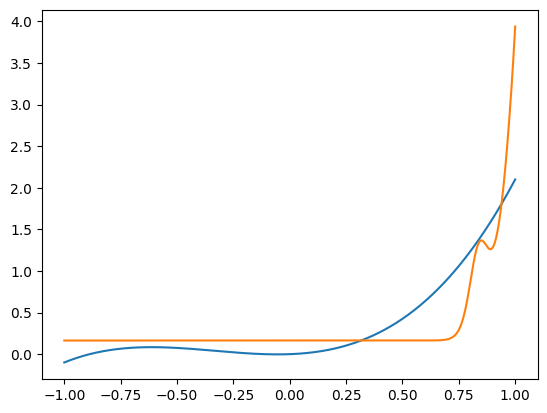

Epoch: 500, Loss: 5.480089115661351
Epoch: 1000, Loss: 5.480334195171791
Epoch: 1500, Loss: 5.480579224738819
Epoch: 2000, Loss: 5.480824204363857
Epoch: 2500, Loss: 5.4810691340487825
Epoch: 3000, Loss: 5.481314013795563
Epoch: 3500, Loss: 5.481558843605815
Epoch: 4000, Loss: 5.481803623481504
Epoch: 4500, Loss: 5.482048353424194
Epoch: 5000, Loss: 5.482293033435904


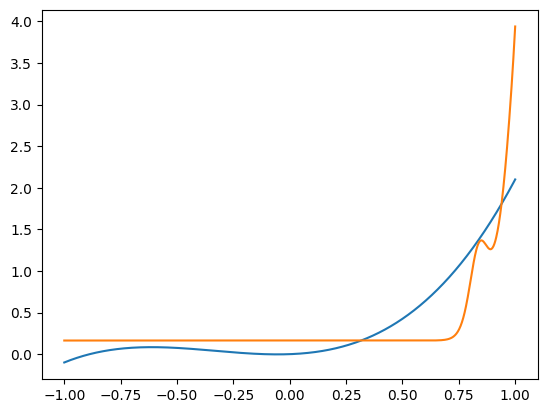

In [6]:
# TODO: train neural networks with different learning rates
# TODO: visualize the results

n_samples = 1000
x , y = create_toy_dataset(n_samples)


# TODO: hyperparameters, parameter initialization, Initialize weights and biases
# different types of initialization are: 
# 'Zero','Random','Xavier','HE','Uniform','Pretrained'
w1, b1, w2, b2 = initialize_parameters(method = 'Pretrained', num_neurons = 500)

epcohs = 5000
step = 500

for i in range(1,6):
    learning_rate = 10**(-i)
    # TODO: training
    NN = NeuralNetwork(x, y, w1, b1, w2, b2, learning_rate, epcohs, step)
    w1, b1, w2, b2 , losses = NN.train()
    #x, y,  w1, b1,  w2, b2, learning_rate , epcohs
    # Normalize the input data
    #X_normalized = X / np.max(X)
    # Train the neural network
    # Predict using the trained network
    predictions = NN.predict()
    plt.plot(x,y)
    plt.plot(x,predictions)
    plt.show()





### 2.4 Network Capacity

In [ ]:
# TODO: train neural networks with different capacities
# TODO: visualize the results
n_samples = 1000
x , y = create_toy_dataset(n_samples)


# TODO: hyperparameters, parameter initialization, Initialize weights and biases
# different types of initialization are: 
# 'Zero','Random','Xavier','HE','Uniform','Pretrained'
num_neuron = [5,50, 100, 500, 1000]

for i in range(5):

    w1, b1, w2, b2 = initialize_parameters(method = 'Pretrained', num_neurons = num_neuron[i])
    epcohs = 5000
    step = 500
    learning_rate = 10**(-1)
    # TODO: training
    NN = NeuralNetwork(x, y, w1, b1, w2, b2, learning_rate, epcohs, step)
    w1, b1, w2, b2 , losses = NN.train()
    #x, y,  w1, b1,  w2, b2, learning_rate , epcohs
    # Normalize the input data
    #X_normalized = X / np.max(X)
    # Train the neural network
    # Predict using the trained network
    predictions = NN.predict()
    plt.plot(x,y)
    plt.plot(x,predictions)
    plt.show()


0.27579374236953175


### 2.5 Regularization

In [ ]:
class NeuralNetwork():
    def __init__(self, parameters, learning_rate, step):
        return
    
    def train(self, x, y, epochs, decay):
        # TODO
        # You can modify here to add the gradients for the regularization terms
    
    def predict(self, x):
        # TODO

IndentationError: expected an indented block after function definition on line 2 (1097356877.py, line 5)

In [ ]:
# TODO: train neural networks with different decays
# TODO: visualize the results